# 데이터 분리

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
# parameter set
import pandas as pd
import numpy as np
from keras import optimizers
from keras import callbacks
from sklearn.model_selection import train_test_split
from keras.models import Model
from mkmodel import makemodel

optimizer = optimizers.Adam(0.01)
early_stop = callbacks.EarlyStopping(monitor='val_mean_squared_logarithmic_error', patience=10)

EPOCHS = 200
rmse_result = list()

Using TensorFlow backend.


In [3]:
data = pd.read_csv('dataset_age_G_H_W_D.csv')

data = data.drop(['DATE'], axis=1)
data = data.rename(columns= {'L3008' : 'TC',
                             'L3062' : 'HDL-C',
                             'L3061' : 'TG',
                             'L3068' : 'LDL-C'})

x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)

x_train1 = pd.DataFrame(np.array(x_train)[:round(int(len(x_train)*0.5))])
x_train2 = pd.DataFrame(np.array(x_train)[round(int(len(x_train)*0.5)):round(int(len(x_train)*0.7))])
x_train3 = pd.DataFrame(np.array(x_train)[round(int(len(x_train)*0.7)):round(int(len(x_train)))])

data_col = data.columns

x_train1.columns = data_col
x_train2.columns = data_col
x_train3.columns = data_col

y_train1 = x_train1.pop('LDL-C')
y_train2 = x_train2.pop('LDL-C')
y_train3 = x_train3.pop('LDL-C')

y_train = x_train.pop('LDL-C')
y_test = x_test.pop('LDL-C')

test_base = makemodel.test_base(x_train)
test_base.compile(loss='mse', optimizer=optimizer, metrics=['mean_squared_logarithmic_error'])
test_base.summary()

merged_train = np.concatenate([x_train1, x_train2, x_train3], axis=0)

history1 = test_base.fit(merged_train, 
                        y_train, 
                        batch_size=2048, 
                        epochs=EPOCHS,                         
                        validation_data=(x_test, y_test))
# callbacks=[early_stop], 

mse, _ = test_base.evaluate(x_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))
# rmse_result.append(rmse)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
layer2 (Dropout)             (None, 128)               0         
_________________________________________________________________
layer3 (Dense)               (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
layer4 (Dropout)             (None, 64)                0         
_________________________________________________________________
layer5 (Dense)               (None, 16)                1040      
__________

326032/326032 [==============================] - 4s 11us/step - loss: 100.8707 - mean_squared_logarithmic_error: 0.0120 - val_loss: 121.8711 - val_mean_squared_logarithmic_error: 0.0128
Epoch 74/200
326032/326032 [==============================] - 4s 11us/step - loss: 100.8157 - mean_squared_logarithmic_error: 0.0120 - val_loss: 131.5496 - val_mean_squared_logarithmic_error: 0.0126
Epoch 75/200
326032/326032 [==============================] - 4s 11us/step - loss: 100.5805 - mean_squared_logarithmic_error: 0.0119 - val_loss: 100.2968 - val_mean_squared_logarithmic_error: 0.0108
Epoch 76/200
326032/326032 [==============================] - 4s 11us/step - loss: 98.5019 - mean_squared_logarithmic_error: 0.0119 - val_loss: 92.7206 - val_mean_squared_logarithmic_error: 0.0112
Epoch 77/200
326032/326032 [==============================] - 4s 11us/step - loss: 100.6770 - mean_squared_logarithmic_error: 0.0120 - val_loss: 127.2051 - val_mean_squared_logarithmic_error: 0.0130
Epoch 78/200
326032/

326032/326032 [==============================] - 4s 11us/step - loss: 98.2152 - mean_squared_logarithmic_error: 0.0118 - val_loss: 89.9470 - val_mean_squared_logarithmic_error: 0.0102
Epoch 156/200
326032/326032 [==============================] - 4s 11us/step - loss: 99.1810 - mean_squared_logarithmic_error: 0.0118 - val_loss: 96.5035 - val_mean_squared_logarithmic_error: 0.0106
Epoch 157/200
326032/326032 [==============================] - 4s 11us/step - loss: 99.6561 - mean_squared_logarithmic_error: 0.0124 - val_loss: 99.0229 - val_mean_squared_logarithmic_error: 0.0104
Epoch 158/200
326032/326032 [==============================] - 4s 11us/step - loss: 99.0807 - mean_squared_logarithmic_error: 0.0118 - val_loss: 104.9530 - val_mean_squared_logarithmic_error: 0.0107
Epoch 159/200
326032/326032 [==============================] - 4s 11us/step - loss: 98.1579 - mean_squared_logarithmic_error: 0.0117 - val_loss: 111.2927 - val_mean_squared_logarithmic_error: 0.0116
Epoch 160/200
326032/3

In [4]:
data = pd.read_csv('dataset_age_G_H_W_D.csv')

data = data.drop(['DATE'], axis=1)
data = data.rename(columns= {'L3008' : 'TC',
                             'L3062' : 'HDL-C',
                             'L3061' : 'TG',
                             'L3068' : 'LDL-C'})

x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)

x_train1 = pd.DataFrame(np.array(x_train)[:round(int(len(x_train)*0.5))])
x_train2 = pd.DataFrame(np.array(x_train)[round(int(len(x_train)*0.5)):round(int(len(x_train)*0.7))])
x_train3 = pd.DataFrame(np.array(x_train)[round(int(len(x_train)*0.7)):round(int(len(x_train)))])

data_col = data.columns

x_train1.columns = data_col
x_train2.columns = data_col
x_train3.columns = data_col

y_train1 = x_train1.pop('LDL-C')
y_train2 = x_train2.pop('LDL-C')
y_train3 = x_train3.pop('LDL-C')

y_train = x_train.pop('LDL-C')
y_test = x_test.pop('LDL-C')

model = makemodel.test_base(x_train)
model.compile(loss='mse', optimizer=optimizer, metrics=['mean_squared_logarithmic_error'])

mergedmodel = Model(inputs=model.input, outputs=model.get_layer('layer2').output)
mergedmodel.summary()

x_train1_passed = mergedmodel.predict(x_train1)
x_train2_passed = mergedmodel.predict(x_train2)
x_train3_passed = mergedmodel.predict(x_train3)
x_test_passed = mergedmodel.predict(x_test)

merged_train = np.concatenate([x_train1_passed, x_train2_passed, x_train3_passed], axis=0)

test_L1out = makemodel.test_L1out(merged_train)
test_L1out.compile(loss='mse', optimizer=optimizer, metrics=['mean_squared_logarithmic_error'])

test_L1out.summary()

history2 = test_L1out.fit(merged_train, 
                        y_train, 
                        batch_size=2048, 
                        epochs=EPOCHS,                         
                        validation_data=(x_test_passed, y_test))
# callbacks=[early_stop], 

mse, _ = test_L1out.evaluate(x_test_passed, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))
# rmse_result.append(rmse)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    (None, 7)                 0         
_________________________________________________________________
layer1 (Dense)               (None, 128)               1024      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
layer2 (Dropout)             (None, 128)               0         
Total params: 1,024
Trainable params: 1,024
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                8256      
_________________________________________________________________
leaky_re

326032/326032 [==============================] - 2s 7us/step - loss: 105.9800 - mean_squared_logarithmic_error: 0.0122 - val_loss: 139.2840 - val_mean_squared_logarithmic_error: 0.0144
Epoch 72/200
326032/326032 [==============================] - 2s 7us/step - loss: 106.0657 - mean_squared_logarithmic_error: 0.0122 - val_loss: 184.8994 - val_mean_squared_logarithmic_error: 0.0188
Epoch 73/200
326032/326032 [==============================] - 2s 7us/step - loss: 104.3571 - mean_squared_logarithmic_error: 0.0120 - val_loss: 142.3374 - val_mean_squared_logarithmic_error: 0.0147
Epoch 74/200
326032/326032 [==============================] - 2s 7us/step - loss: 103.6799 - mean_squared_logarithmic_error: 0.0119 - val_loss: 130.9696 - val_mean_squared_logarithmic_error: 0.0135
Epoch 75/200
326032/326032 [==============================] - 2s 7us/step - loss: 104.7411 - mean_squared_logarithmic_error: 0.0119 - val_loss: 161.6543 - val_mean_squared_logarithmic_error: 0.0163
Epoch 76/200
326032/326

326032/326032 [==============================] - 2s 7us/step - loss: 289.2929 - mean_squared_logarithmic_error: 0.0269 - val_loss: 89.6299 - val_mean_squared_logarithmic_error: 0.0120
Epoch 154/200
326032/326032 [==============================] - 2s 7us/step - loss: 149.7048 - mean_squared_logarithmic_error: 0.0169 - val_loss: 88.8951 - val_mean_squared_logarithmic_error: 0.0120
Epoch 155/200
326032/326032 [==============================] - 2s 7us/step - loss: 136.4984 - mean_squared_logarithmic_error: 0.0160 - val_loss: 89.3858 - val_mean_squared_logarithmic_error: 0.0124
Epoch 156/200
326032/326032 [==============================] - 2s 7us/step - loss: 133.5149 - mean_squared_logarithmic_error: 0.0161 - val_loss: 90.8254 - val_mean_squared_logarithmic_error: 0.0127
Epoch 157/200
326032/326032 [==============================] - 2s 7us/step - loss: 132.4170 - mean_squared_logarithmic_error: 0.0162 - val_loss: 90.3718 - val_mean_squared_logarithmic_error: 0.0128
Epoch 158/200
326032/326

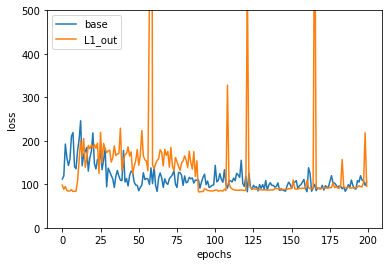

In [36]:
import matplotlib.pyplot as plt
    
plt.plot(history1.history['val_loss'], label='base')
plt.plot(history2.history['val_loss'], label='L1_out')
plt.ylim(0, 500)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.savefig('loss_final.png')
plt.show()

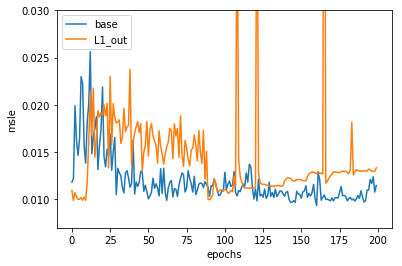

In [35]:
plt.plot(history1.history['val_mean_squared_logarithmic_error'], label='base')
plt.plot(history2.history['val_mean_squared_logarithmic_error'], label='L1_out')
plt.ylim(0.007, 0.03)
plt.ylabel('msle')
plt.xlabel('epochs')
plt.legend()
plt.savefig('msle_final.png')
plt.show()

In [10]:
yhat1 = test_base.predict(x_test)
yhat2 = test_L1out.predict(x_test_passed)
print(yhat1, y_test[:1])
print(yhat2, y_test[:1])

[[113.55577]
 [ 99.01201]
 [ 95.37078]
 ...
 [ 81.16456]
 [ 56.54697]
 [ 80.87488]] 257988    118
Name: LDL-C, dtype: int64
[[117.0022  ]
 [ 92.47746 ]
 [ 96.67325 ]
 ...
 [ 79.2918  ]
 [ 58.563572]
 [ 82.0849  ]] 257988    118
Name: LDL-C, dtype: int64


# Feature Extraction

In [27]:
data.head()

,age,sex_M,HEIGHT,WEIGHT,TC,HDL-C,TG,LDL-C
0,75,0,154.5,47.00,112,66,88,36
1,54,0,158.8,56.60,191,91,132,83
2,54,0,160.0,66.50,266,57,134,181
3,64,1,164.7,66.75,183,48,135,111
4,58,1,172.3,66.60,112,42,97,64


In [25]:
x_train.head()

,age,sex_M,HEIGHT,WEIGHT,TC,HDL-C,TG
320000,62,1,175.0,68.20,178,50,83
110561,80,1,168.0,78.70,104,22,148
398566,56,1,178.0,80.85,207,55,158
57123,73,0,144.8,50.45,144,30,100
187372,66,1,167.7,62.80,138,60,74


In [26]:
pre_x_data = pd.DataFrame(merged_train)
pre_x_data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.503214,-0.137599,40.112144,9.982728,-0.405009,-0.259055,78.527145,10.407497,-0.171025,4.369238,...,18.548847,3.792380,-0.080871,-0.406495,16.076311,50.338806,-0.191389,17.182911,-0.116521,31.607742
1,-0.597019,-0.146288,20.810238,-0.010960,-0.595430,-0.361545,62.924732,3.739822,-0.260156,-0.011856,...,29.603895,-0.181194,7.268904,-0.602713,27.759775,32.228470,-0.307489,10.863036,7.093708,21.312468
2,-0.633414,-0.140751,41.145779,5.857626,-0.531022,-0.301122,90.138817,27.037235,-0.093957,8.027814,...,30.066429,3.759671,-0.149516,-0.521236,16.727221,47.383099,-0.277424,27.486252,-0.133018,35.100769
3,-0.450236,-0.117580,30.929325,1.933800,-0.437348,-0.227122,63.991856,9.344572,-0.158454,0.730852,...,20.884174,-0.037995,-0.024692,-0.428407,16.484474,40.709728,-0.151707,15.261045,-0.048810,23.174639
4,-0.449254,-0.122066,35.635750,4.426434,-0.353916,-0.230735,70.022469,2.403305,-0.188678,5.103384,...,21.277145,-0.047928,-0.051688,-0.421363,20.630644,46.266159,-0.182478,9.744716,-0.094620,27.148880
